# Схема математической статистики

- Любая выборочная характеристика будет случайной величиной

In [1]:
import pandas as pd
import itertools
import numpy as np
from scipy import stats

In [2]:
# дан датафрейм
data = {'Name': ['Маша', 'Паша', 'Саша', 'Даша'],
		'Age':[150, 160, 180, 190]}
df = pd.DataFrame(data)

In [3]:
# среднее генеральной совокупности μ = настоящее среднее
μ = df.Age.mean()
μ

170.0

In [4]:
# оценим среднее, если мы будем выбирать по 2 элемента из выборки
# так называемая пермутационная оценка 
val = df.Name
com_set = itertools.combinations(val, 2 )
# тут хранятся различные оценки μ с шапкой
# получается что оенка среднего - это случайная величина 
estimate_mean = [df.query('Name in @i').Age.mean() for i in [i for i in  com_set]]
np.mean(estimate_mean)

170.0

<AxesSubplot:>

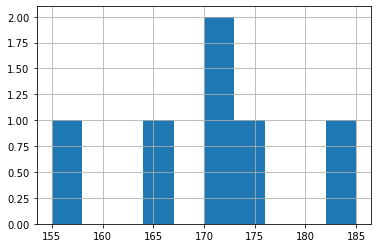

In [5]:
pd.Series(estimate_mean).hist()

In [6]:
# таким образом можно сказать что 
assert np.mean(estimate_mean) == μ

**x̄ при большом числе наблюдений, вошедших в него, имеет нормальное распределение**

[Правило трех сигм](https://yandex.ru/images/search?pos=1&img_url=https%3A%2F%2Fimage2.slideserve.com%2F4737516%2Fnormal-distribution-and-standard-deviation-l.jpg&text=травило%203p%5B%20сигм&lr=75&rpt=simage&source=wiz)

In [7]:
# любое среднее можно апроксимировать нормальным распредлением  (ЦПТ)
# зачем: мы сможем поставить засчеки, внутри которой оказалась основаная вероятносная масса) и рассуждать о том о том, насколько точную оценку мы получили 

$$\overline{X}  \sim N (\mu, \frac{\sigma^2}{n}) $$

In [8]:
# оценка среднего c вероятность 99,99 %
# мы не знаем сигма, на оценку для сигмы 

$$\overline{X} - 3 * \frac{\hat{\sigma}}{\sqrt{n}} \leq  {\mu} \leq  \overline{X} + 3 * \frac{\hat{\sigma}}{\sqrt{n}}$$

In [9]:
# несмещенная оценка 

$$s = \sqrt{\frac{1}{n-1} * \Sigma(x_i - \overline{x})^2}$$

In [10]:
def est_mu(n, est_sigma, est_mu, p):
    '''
    if probabilty = 0.975, это значит слева и справа по 97.5%, тогда получается 
        что 2*(100%-97.5%)= 5%
        then coef = 1.96
    '''
    alpha = (1-p)/2
    coef = stats.norm().isf(alpha)
    print(f'coef = {coef:.2f}')
    left = est_mu - coef* est_sigma/n**(1/2)
    right = est_mu + coef* est_sigma/n**(1/2)
    return f'Probability that est_mu is belong to {str([left, right])} is {p*100}'

In [11]:
est_mu(n = 2, est_sigma = 28.2, est_mu = 170 , p = 0.95)

coef = 1.96


'Probability that est_mu is belong to [130.9175121533391, 209.0824878466609] is 95.0'

Если дрверительный интервал получается широким - это означает, что кол-во наблюдений мало, для точной оценки мреднего в генеральной совокупности

In [20]:
est_mu(n = 100, est_sigma = 25, est_mu = 6 , p = 0.95)

coef = 1.96


'Probability that est_mu is belong to [1.1000900386498653, 10.899909961350135] is 95.0'

In [18]:
x_avg = 100
x_true = 160
sigma = 28.2
n = 2 
p = 0.95
alpha = (1-p)/2
z_stat = (x_avg-x_true)/(sigma/np.sqrt(2))
print(f'z-stat {z_stat}')

coef = stats.norm().isf(alpha)
print(f'coef = {[-coef, coef]}')
if np.abs(z_stat) > np.abs(coef):
    print('z-stat не принадлежит интервалу')
else:
    print('z-stat принадлежит интервалу')

z-stat -3.0089650263257344
coef = [-1.959963984540054, 1.959963984540054]
z-stat не принадлежит интервалу


In [13]:
# центрирование и нормирование дает возможность говорить про асимптотическое распредление для N(0, 1)

- чем больше выборка, тем уже получается доверительный интервал
- чем больше дисперсия, тем шире получается доверительный интервал
- ширина доверительного интервала не зависит от того, какой оказалась оценка среднего

мы ошибёмся с вероятностью 1%, так как наш доверительный интервал будет накрывать истинное значение с вероятностью 99%

Если мы хотим в ходе тестирования получать не такие размытые результаты,
нам нужно собрать больше наблюдений, тогда доверительные интервалы станут уже, мы
сможем улавливать более мелкие изменения, и наши выводы будут точнее.

# Метод моментов

iid - Independent and identically distributed random variables : **независимость и какой-то вид распределения**

- Закон больших чисел говорит нам, что среднее выборочное X̄ является хорошей оценкой для математического (**то есть на практике это значит, что выборочное среднее сходится по вероятности к своему мат ожиданию)**
ожидания
- любое среднее можно апроксимировать нормальным распредлением  (ЦПТ)

момент $E(X_{i}^k)$ зависит от неизвестного параметра  $\theta$: $$E(X_{i}^k) = f(\theta)$$
оценкой момента называется случаная велечина $\hat{\theta_{MM}} = f^{-1}(X_{i}^k)$
то есть оцуенка получается решением уравнения $$E(X_{i}^k) \approx \frac{\Sigma x_{i}^k}{n}$$
**математическое ожидание k-ой степени случайно величины примерно совпадает со средним порядка k**


Чаще всего используею момент первого порядка, но если он равен 0, то используют моменты более высоких порядков

Нужно оценить 2 параметра (дисперсию и мат ожиданию), тто сразу используют 2 момента
\begin{cases}
   E(X_{i} ) \approx   \overline{x}\\
   E(X_{i}^2) \approx   \overline{x^2} 
 \end{cases}
 
 \begin{cases}
   \mu  =   \overline{x}\\
    \mu^2 + \sigma^2   = \overline{x^2} 
 \end{cases}

  \begin{cases}
   \mu  =   \overline{x}\\
    \sigma^2   = \overline{x^2} -\overline{x}^2
 \end{cases}

геометрическое распеределние - выбирать до первого успеха

- Понять распределение оценки  $\hat \theta$  помогают разные теоремы, нужную теорему мы выбираем в зависимости от предпосылок, которые мы наложили на выборку
- Метод моментов помогает найти оценку $ \hat \theta $
- Мы хотим понять распределение оценки  $\hat \theta$  , чтобы построить для неё доверительный интервал и понять насколько она точная  
- Если мы хотим привлечь ЦПТ, чтобы понять распределение оценки, выборка должна собираться независимо, в ней не должно быть аномалий